In [3]:
# imports
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix

%load_ext autoreload
%autoreload 2


# making all pandas columns visable with display command
pd.set_option('display.max_columns', 500)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Reading Data

### Data Train (Season 2009/2010 until Season 2010/2011)

In [120]:
df1 = pd.read_csv("datasets/EPL_sort.csv", index_col=0)
df1 = df1[df1['season'] != '2008/2009']
df1 = df1[['match_api_id','B365H', 'B365D', 'B365A']]
df1.head()

,match_api_id,B365H,B365D,B365A
382,658575,1.67,3.60,5.50
385,658578,3.60,3.25,2.10
386,658579,2.25,3.25,3.25
389,658582,1.17,6.50,21.00
383,658576,3.20,3.25,2.30


In [121]:
df2 = pd.read_csv("datasets/epl_data_train_onehot_matchid.csv")
df2.head()

,match_api_id,FTR,HTGS,ATGS,HTGC,ATGC,HTP,ATP,HM1,HM2,HM3,HM4,HM5,AM1,AM2,AM3,AM4,AM5,HTWinStreak3,HTWinStreak5,HTLossStreak3,HTLossStreak5,ATWinStreak3,ATWinStreak5,ATLossStreak3,ATLossStreak5,HTGD,ATGD,DiffPts,DiffFormPts,DiffLP
0,1987033,0,0.0,0.0,0.0,0.0,0.0,0.0,2,2,2,2,2,2,2,2,2,2,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,3
1,1987034,1,0.0,0.0,0.0,0.0,0.0,0.0,2,2,2,2,2,2,2,2,2,2,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,-9
2,1987035,1,0.0,0.0,0.0,0.0,0.0,0.0,2,2,2,2,2,2,2,2,2,2,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,-13
3,1987036,2,0.0,0.0,0.0,0.0,0.0,0.0,2,2,2,2,2,2,2,2,2,2,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,4
4,1987037,2,0.0,0.0,0.0,0.0,0.0,0.0,2,2,2,2,2,2,2,2,2,2,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1


In [129]:
df_train = df1.set_index('match_api_id').join(df2.set_index('match_api_id'))
df_train = df_train.reset_index()
df_train = df_train.drop(columns = ['match_api_id'])
df_train.tail(10)

,B365H,B365D,B365A,FTR,HTGS,ATGS,HTGC,ATGC,HTP,ATP,HM1,HM2,HM3,HM4,HM5,AM1,AM2,AM3,AM4,AM5,HTWinStreak3,HTWinStreak5,HTLossStreak3,HTLossStreak5,ATWinStreak3,ATWinStreak5,ATLossStreak3,ATLossStreak5,HTGD,ATGD,DiffPts,DiffFormPts,DiffLP
2650,1.17,9.00,17.00,2,0.61,0.281250,0.433735,0.911392,0.026316,0.026316,0,3,0,3,0,0,1,1,1,1,0,0,0,0,0,0,1,0,0.657895,-1.184211,0.000000,0.210526,-11
2651,2.30,3.75,3.10,1,0.58,0.697917,0.626506,0.443038,0.026316,0.078947,0,1,0,3,1,3,0,3,0,3,0,0,0,0,0,0,0,0,0.157895,0.842105,-0.052632,-0.157895,-15
2652,1.80,4.00,4.50,2,0.56,0.406250,0.662651,0.810127,0.000000,0.078947,1,1,3,1,0,3,1,1,1,1,0,0,0,0,0,0,1,0,0.026316,-0.657895,-0.078947,0.026316,-13
2653,4.50,4.00,1.80,2,0.39,0.708333,0.771084,0.379747,0.026316,0.000000,0,3,0,0,3,1,0,0,3,3,0,0,0,0,0,0,0,0,-0.657895,1.000000,0.026316,0.026316,4
2654,1.36,5.50,9.00,2,0.55,0.395833,0.481928,0.594937,0.078947,0.078947,3,3,3,0,3,3,1,1,0,0,0,0,0,0,0,0,0,0,0.394737,-0.236842,0.000000,0.210526,-3
2655,3.50,3.60,2.15,2,0.39,0.666667,0.650602,0.620253,0.000000,0.078947,1,0,1,1,1,3,1,3,3,0,0,0,1,0,0,0,0,0,-0.394737,0.394737,-0.078947,-0.236842,-4
2656,6.00,4.75,1.53,1,0.41,0.729167,0.614458,0.506329,0.078947,0.026316,3,3,1,1,3,0,1,3,0,3,0,0,0,0,0,0,0,0,-0.263158,0.789474,0.052632,0.026316,11
2657,2.05,3.75,3.70,1,0.38,0.479167,0.578313,0.759494,0.000000,0.078947,1,1,3,1,3,3,3,0,0,3,0,0,0,0,0,0,0,0,-0.263158,-0.368421,-0.078947,-0.131579,4
2658,2.40,3.60,3.00,1,0.33,0.645833,0.566265,0.620253,0.026316,0.026316,0,1,0,1,1,0,3,1,0,3,0,0,0,0,0,0,0,0,-0.368421,0.342105,0.000000,-0.157895,15
2659,1.67,4.20,5.25,2,0.46,0.458333,0.409639,0.810127,0.000000,0.026316,1,3,0,3,3,0,1,1,1,3,0,0,0,0,0,0,0,0,0.315789,-0.526316,-0.026316,0.157895,-11


### Data Test (Season 2008/2009)

In [123]:
df3 = pd.read_csv("datasets/EPL_sort.csv", index_col=0)
df3 = df3[df3['season'] == '2008/2009']
df3 = df3[['match_api_id','B365H', 'B365D', 'B365A']]
df3.head()

,match_api_id,B365H,B365D,B365A
1,489043,1.20,6.5,15.00
7,489049,1.83,3.5,4.50
5,489047,2.00,3.3,4.00
8,489050,2.60,3.2,2.80
6,489048,3.20,3.4,2.25


In [124]:
df4 = pd.read_csv("datasets/epl_data_test_onehot_matchid.csv")
df4.head()

,match_api_id,FTR,HTGS,ATGS,HTGC,ATGC,HTP,ATP,HM1,HM2,HM3,HM4,HM5,AM1,AM2,AM3,AM4,AM5,HTWinStreak3,HTWinStreak5,HTLossStreak3,HTLossStreak5,ATWinStreak3,ATWinStreak5,ATLossStreak3,ATLossStreak5,HTGD,ATGD,DiffPts,DiffFormPts,DiffLP
0,489043,2,0.0,0.0,0.0,0.0,0.0,0.0,2,2,2,2,2,2,2,2,2,2,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,-14
1,489049,2,0.0,0.0,0.0,0.0,0.0,0.0,2,2,2,2,2,2,2,2,2,2,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,-11
2,489047,0,0.0,0.0,0.0,0.0,0.0,0.0,2,2,2,2,2,2,2,2,2,2,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,-4
3,489050,2,0.0,0.0,0.0,0.0,0.0,0.0,2,2,2,2,2,2,2,2,2,2,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0
4,489048,2,0.0,0.0,0.0,0.0,0.0,0.0,2,2,2,2,2,2,2,2,2,2,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,7


In [128]:
df_test = df3.set_index('match_api_id').join(df4.set_index('match_api_id'))
df_test = df_test.reset_index()
df_test = df_test.drop(columns = ['match_api_id'])
df_test.tail(10)

,B365H,B365D,B365A,FTR,HTGS,ATGS,HTGC,ATGC,HTP,ATP,HM1,HM2,HM3,HM4,HM5,AM1,AM2,AM3,AM4,AM5,HTWinStreak3,HTWinStreak5,HTLossStreak3,HTLossStreak5,ATWinStreak3,ATWinStreak5,ATLossStreak3,ATLossStreak5,HTGD,ATGD,DiffPts,DiffFormPts,DiffLP
370,1.33,5.0,10.00,2,0.64,0.385417,0.433735,0.645570,0.026316,0.078947,0,1,3,3,0,3,3,1,1,3,0,0,0,0,0,0,0,0,0.736842,-0.368421,-0.052632,-0.026316,-14
371,2.30,3.4,3.10,2,0.53,0.416667,0.578313,0.734177,0.026316,0.000000,0,1,3,0,0,1,3,1,0,1,0,0,0,0,0,0,0,0,0.131579,-0.473684,0.026316,0.052632,-2
372,1.83,3.5,4.50,1,0.40,0.375000,0.722892,0.848101,0.000000,0.000000,1,3,1,3,1,1,3,1,3,1,0,0,0,0,0,0,0,0,-0.526316,-0.815789,0.000000,0.000000,-8
373,2.10,3.3,3.60,0,0.39,0.552083,0.385542,0.468354,0.078947,0.078947,3,3,1,3,0,3,0,3,1,0,0,0,0,0,0,0,0,0,0.184211,0.421053,0.000000,0.052632,12
374,3.00,3.5,2.30,0,0.39,0.697917,0.759036,0.303797,0.026316,0.026316,0,1,1,1,1,0,3,3,3,3,0,0,1,0,1,0,0,0,-0.631579,1.131579,0.000000,-0.315789,17
375,1.53,4.0,6.50,2,0.74,0.458333,0.313253,0.531646,0.078947,0.078947,3,3,3,3,0,3,0,3,1,3,0,0,0,0,0,0,0,0,1.263158,0.052632,0.000000,0.078947,-2
376,1.73,3.6,5.00,2,0.57,0.427083,0.602410,0.658228,0.000000,0.026316,1,1,3,3,3,0,0,0,0,1,1,0,0,0,0,0,0,0,0.184211,-0.289474,-0.026316,0.131579,7
377,4.00,3.6,1.91,0,0.32,0.677083,0.614458,0.278481,0.000000,0.078947,1,0,1,1,3,3,3,3,3,0,0,0,0,0,0,0,0,0,-0.500000,1.131579,-0.078947,-0.236842,16
378,2.25,3.4,3.20,2,0.40,0.281250,0.530120,0.696203,0.000000,0.026316,1,1,3,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,-0.105263,-0.736842,-0.026316,0.052632,3
379,2.10,3.4,3.50,2,0.33,0.395833,0.542169,0.708861,0.000000,0.078947,1,1,1,0,1,3,1,1,0,1,0,0,0,0,0,0,0,0,-0.315789,-0.473684,-0.078947,-0.078947,9


## Preprocessing

In [137]:
x_train = df_train.drop(columns = ['FTR'])
y_train = df_train['FTR']
x_test = df_test.drop(columns = ['FTR'])
y_test = df_test['FTR']
bet_train = df_train[['B365H', 'B365D', 'B365A']]
bet_test = df_test[['B365H', 'B365D', 'B365A']]
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print(bet_train.shape)
print(bet_test.shape)

(2660, 32)
(2660,)
(380, 32)
(380,)
(2660, 3)
(380, 3)


In [138]:
columns = x_train.values.shape[1]
columns

32

## First neural model start here

In [142]:
# 41-75-3
# We first need to define the sequence of dependencies (the computational graph)
# x = Input(shape=(20,32))
x = Input(shape=(columns,))
# h = Conv2D(32, (7, 7), strides=(2, 2))(x)
# h = Activation('relu')(x)
h = Flatten()(x)
h = Dense(41)(h)
h = Dense(75)(h)
# for i in range(10):
#     h = Dense(75)(h)
h = Dropout(0.3)(h)
p = Activation('softmax')(h)

# Now that we have defined how to find p from x, we can create a 
# model simply by saying what is input and what is output
model = Model(inputs=x, outputs=p)
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(lr=0.00001), metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32)]              0         
_________________________________________________________________
flatten (Flatten)            (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 41)                1353      
_________________________________________________________________
dense_1 (Dense)              (None, 75)                3150      
_________________________________________________________________
dropout (Dropout)            (None, 75)                0         
_________________________________________________________________
activation (Activation)      (None, 75)                0         
Total params: 4,503
Trainable params: 4,503
Non-trainable params: 0
___________________________________________________________

In [144]:
history = model.fit(x_train, y_train, batch_size=16, epochs=200, validation_split=0.04)

Epoch 1/200
160/160 [==============================] - 1s 4ms/step - loss: 7.3906 - accuracy: 0.0000e+00 - val_loss: 6.2621 - val_accuracy: 0.0000e+00
Epoch 2/200
160/160 [==============================] - 0s 2ms/step - loss: 7.0629 - accuracy: 0.0000e+00 - val_loss: 6.0429 - val_accuracy: 0.0000e+00
Epoch 3/200
160/160 [==============================] - 0s 2ms/step - loss: 6.8111 - accuracy: 7.8339e-04 - val_loss: 5.8278 - val_accuracy: 0.0000e+00
Epoch 4/200
160/160 [==============================] - 0s 2ms/step - loss: 6.4751 - accuracy: 7.8339e-04 - val_loss: 5.6184 - val_accuracy: 0.0000e+00
Epoch 5/200
160/160 [==============================] - 0s 2ms/step - loss: 6.2017 - accuracy: 0.0027 - val_loss: 5.4155 - val_accuracy: 0.0000e+00
Epoch 6/200
160/160 [==============================] - 0s 2ms/step - loss: 5.9376 - accuracy: 0.0067 - val_loss: 5.2154 - val_accuracy: 0.0093
Epoch 7/200
160/160 [==============================] - 0s 2ms/step - loss: 5.7034 - accuracy: 0.0129 - val

Epoch 58/200
160/160 [==============================] - 0s 2ms/step - loss: 2.1366 - accuracy: 0.4238 - val_loss: 1.3384 - val_accuracy: 0.4673
Epoch 59/200
160/160 [==============================] - 0s 2ms/step - loss: 2.0775 - accuracy: 0.4211 - val_loss: 1.3278 - val_accuracy: 0.4673
Epoch 60/200
160/160 [==============================] - 0s 2ms/step - loss: 2.1365 - accuracy: 0.4128 - val_loss: 1.3198 - val_accuracy: 0.4766
Epoch 61/200
160/160 [==============================] - 0s 2ms/step - loss: 2.1187 - accuracy: 0.4199 - val_loss: 1.3115 - val_accuracy: 0.4766
Epoch 62/200
160/160 [==============================] - 0s 2ms/step - loss: 2.1137 - accuracy: 0.4136 - val_loss: 1.3039 - val_accuracy: 0.4766
Epoch 63/200
160/160 [==============================] - 1s 4ms/step - loss: 2.0164 - accuracy: 0.4348 - val_loss: 1.2928 - val_accuracy: 0.4766
Epoch 64/200
160/160 [==============================] - 0s 2ms/step - loss: 1.9969 - accuracy: 0.4281 - val_loss: 1.2813 - val_accuracy:

Epoch 115/200
160/160 [==============================] - 0s 2ms/step - loss: 2.0151 - accuracy: 0.4207 - val_loss: 1.0492 - val_accuracy: 0.4766
Epoch 116/200
160/160 [==============================] - 0s 2ms/step - loss: 1.9465 - accuracy: 0.4399 - val_loss: 1.0475 - val_accuracy: 0.4766
Epoch 117/200
160/160 [==============================] - 0s 2ms/step - loss: 1.9788 - accuracy: 0.4332 - val_loss: 1.0458 - val_accuracy: 0.4673
Epoch 118/200
160/160 [==============================] - 0s 2ms/step - loss: 1.9650 - accuracy: 0.4379 - val_loss: 1.0443 - val_accuracy: 0.4766
Epoch 119/200
160/160 [==============================] - 0s 2ms/step - loss: 2.0127 - accuracy: 0.4219 - val_loss: 1.0430 - val_accuracy: 0.4860
Epoch 120/200
160/160 [==============================] - 0s 2ms/step - loss: 1.9815 - accuracy: 0.4293 - val_loss: 1.0410 - val_accuracy: 0.4860
Epoch 121/200
160/160 [==============================] - 0s 2ms/step - loss: 2.0062 - accuracy: 0.4363 - val_loss: 1.0398 - val_ac

160/160 [==============================] - 0s 2ms/step - loss: 1.9072 - accuracy: 0.4520 - val_loss: 1.0011 - val_accuracy: 0.4766
Epoch 172/200
160/160 [==============================] - 0s 2ms/step - loss: 1.9042 - accuracy: 0.4532 - val_loss: 1.0007 - val_accuracy: 0.4860
Epoch 173/200
160/160 [==============================] - 0s 2ms/step - loss: 1.9920 - accuracy: 0.4360 - val_loss: 1.0002 - val_accuracy: 0.4860
Epoch 174/200
160/160 [==============================] - 0s 2ms/step - loss: 1.9028 - accuracy: 0.4516 - val_loss: 0.9999 - val_accuracy: 0.4766
Epoch 175/200
160/160 [==============================] - 0s 2ms/step - loss: 1.9400 - accuracy: 0.4505 - val_loss: 0.9996 - val_accuracy: 0.4766
Epoch 176/200
160/160 [==============================] - 0s 2ms/step - loss: 1.9500 - accuracy: 0.4450 - val_loss: 0.9998 - val_accuracy: 0.4953
Epoch 177/200
160/160 [==============================] - 0s 2ms/step - loss: 1.9323 - accuracy: 0.4489 - val_loss: 0.9998 - val_accuracy: 0.4953

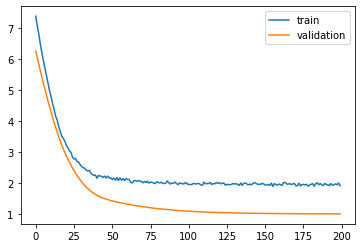

In [145]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.show()

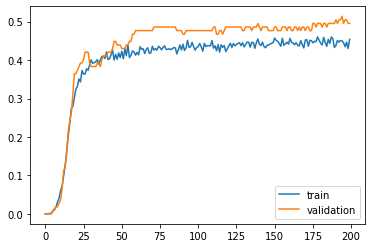

In [148]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.legend()
plt.show()

In [151]:
predictions = np.argmax(model.predict(x_test), axis=1)
accuracy = (predictions == y_test.values).sum() / y_test.values.shape[0]
print("Test set accuracy:", accuracy)

Test set accuracy: 0.55


## Betting time...

### Outcome when bet on home team
Just a sanity check. Should not see high/any yields

In [ ]:
modelTester = ModelTester(model, x_train, y_train, x_test, y_test, bet_train, bet_test)

In [152]:
# agencies = ['B365', 'BW', 'IW', 'LB', 'WH', 'SJ', 'VC', 'GB', 'BS']
agencies = ['B365']

In [153]:
print("Test set size", y_test.shape)

Test set size (380,)


### Sanity checks by static betting

In [39]:
modelTester.predict_home_wins_only_profit(data="train")

Agency B365, 	win amount: -358.02
Agency BW, 	win amount: -672.98
Agency IW, 	win amount: -1066.66
Agency LB, 	win amount: -809.56
Agency WH, 	win amount: -522.30
Agency SJ, 	win amount: 413.09
Agency VC, 	win amount: -158.62
Agency GB, 	win amount: 570.80
Agency BS, 	win amount: 566.73


In [40]:
modelTester.predict_home_wins_only_profit(data="test")

Agency B365, 	win amount: -24.49
Agency BW, 	win amount: -109.16
Agency IW, 	win amount: -207.18
Agency LB, 	win amount: -137.50
Agency WH, 	win amount: -70.90
Agency SJ, 	win amount: 151.43
Agency VC, 	win amount: 28.22
Agency GB, 	win amount: 172.61
Agency BS, 	win amount: 167.05


In [41]:
modelTester.predict_draw_only_profit(data="train")

Agency B365, 	win amount: -1510.41
Agency BW, 	win amount: -1904.15
Agency IW, 	win amount: -2422.72
Agency LB, 	win amount: -2037.35
Agency WH, 	win amount: -2249.13
Agency SJ, 	win amount: -1612.36
Agency VC, 	win amount: -1259.90
Agency GB, 	win amount: -1998.52
Agency BS, 	win amount: -1916.66


In [42]:
modelTester.predict_away_wins_only_profit(data="test")

Agency B365, 	win amount: -193.12
Agency BW, 	win amount: -391.92
Agency IW, 	win amount: -544.97
Agency LB, 	win amount: -420.50
Agency WH, 	win amount: -356.55
Agency SJ, 	win amount: 283.93
Agency VC, 	win amount: -106.94
Agency GB, 	win amount: 304.80
Agency BS, 	win amount: 324.83


In [43]:
modelTester.predict_bet_home_away_profit(data="train")

Agency B365, 	win amount: -1255.44
Agency BW, 	win amount: -2308.64
Agency IW, 	win amount: -3345.15
Agency LB, 	win amount: -2503.40
Agency WH, 	win amount: -1956.18
Agency SJ, 	win amount: 1448.62
Agency VC, 	win amount: -678.29
Agency GB, 	win amount: 1651.16
Agency BS, 	win amount: 1845.30


In [44]:
modelTester.predict_bet_home_away_profit(data="test")

Agency B365, 	win amount: -217.62
Agency BW, 	win amount: -501.08
Agency IW, 	win amount: -752.15
Agency LB, 	win amount: -558.00
Agency WH, 	win amount: -427.44
Agency SJ, 	win amount: 435.37
Agency VC, 	win amount: -78.72
Agency GB, 	win amount: 477.41
Agency BS, 	win amount: 491.88


In [45]:
modelTester.predict_bet_on_all_profit(data="train")

Agency B365, 	win amount: -2765.85
Agency BW, 	win amount: -4212.79
Agency IW, 	win amount: -5767.86
Agency LB, 	win amount: -4540.75
Agency WH, 	win amount: -4205.31
Agency SJ, 	win amount: -163.74
Agency VC, 	win amount: -1938.20
Agency GB, 	win amount: -347.36
Agency BS, 	win amount: -71.36


In [46]:
modelTester.predict_bet_on_all_profit(data="test")

Agency B365, 	win amount: -621.65
Agency BW, 	win amount: -992.96
Agency IW, 	win amount: -1379.64
Agency LB, 	win amount: -1088.70
Agency WH, 	win amount: -1013.40
Agency SJ, 	win amount: 29.11
Agency VC, 	win amount: -420.18
Agency GB, 	win amount: -40.25
Agency BS, 	win amount: -6.11


### Bet on every match
Always bet on the predicted winner.

In [47]:
modelTester.always_bet_predicted_winner_profit()

Agency B365, 	win amount: 613.18
Agency BW, 	win amount: 520.03
Agency IW, 	win amount: 452.74
Agency LB, 	win amount: 496.73
Agency WH, 	win amount: 560.19
Agency SJ, 	win amount: 1344.42
Agency VC, 	win amount: 674.26
Agency GB, 	win amount: 1570.76
Agency BS, 	win amount: 1586.42


### Bet when expected return high enough
First calculate the expected return of the team expected to win. If yield is high enough, then bet. 
* yield = prediction probability * odds. 
* Bet if yield > threshold.

In [48]:
modelTester.bet_predicted_winner_with_threshold_profit("test", threshold=1)

Agency B365, 	win amount: 2271.63. Didn't bet on 70.95% of matches
Agency BW, 	win amount: 2160.75. Didn't bet on 71.77% of matches
Agency IW, 	win amount: 2061.74. Didn't bet on 71.78% of matches
Agency LB, 	win amount: 2120.68. Didn't bet on 71.92% of matches
Agency WH, 	win amount: 2210.53. Didn't bet on 71.02% of matches
Agency SJ, 	win amount: 3146.63. Didn't bet on 65.43% of matches
Agency VC, 	win amount: 2356.20. Didn't bet on 70.44% of matches
Agency GB, 	win amount: 3408.79. Didn't bet on 63.04% of matches
Agency BS, 	win amount: 3426.57. Didn't bet on 62.92% of matches


### Bet on highest return
Multiplies the neural network match predictions with betting odds and from these multiplications chooses from home win, draw, away win the highest expected return value. A threshhold can be set to choose if the yield is high enough to bet.  [prediction probability * odds > threshold]

In [49]:
modelTester.predict_on_highest_return(threshold=2.5)

Agency B365, 	win amount: -66.00. Didn't bet on 97.92% of matches
Agency BW, 	win amount: -40.00. Didn't bet on 98.67% of matches
Agency IW, 	win amount: -18.00. Didn't bet on 99.20% of matches
Agency LB, 	win amount: -41.00. Didn't bet on 98.62% of matches
Agency WH, 	win amount: -53.00. Didn't bet on 98.30% of matches
Agency SJ, 	win amount: -116.00. Didn't bet on 95.30% of matches
Agency VC, 	win amount: -83.00. Didn't bet on 97.51% of matches
Agency GB, 	win amount: -92.00. Didn't bet on 95.56% of matches
Agency BS, 	win amount: -107.00. Didn't bet on 95.11% of matches
